In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Set random number for reproducibility
np.random.seed(2)

In [4]:
# a
mu  = 1
sigma = 0.1
sample_size = 500
a = np.random.normal(loc=mu, scale=sigma, size=sample_size,)

# b
mu  = 1
sigma = 0.2
b = np.random.normal(loc=mu, scale=sigma, size=sample_size,)

# c
mu  = 3
sigma = 0.5
c = np.random.normal(loc=mu, scale=sigma, size=sample_size,)

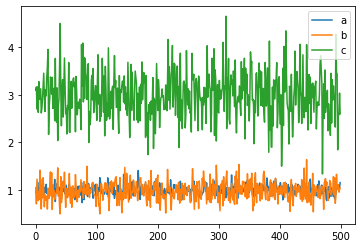

In [5]:
plt.figure()
plt.plot(np.arange(len(a)),a, label="a")
plt.plot(np.arange(len(b)),b, label="b")
plt.plot(np.arange(len(c)),c, label="c")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

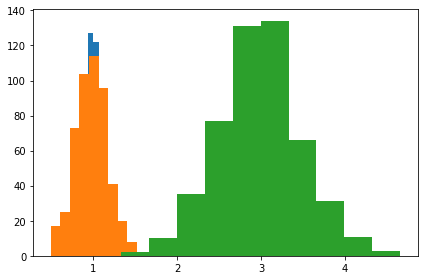

In [6]:
# convert histograms into distributions
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
bins = 10
a = axs.hist(a, bins=bins)
b = axs.hist(b, bins=bins)
c = axs.hist(c, bins=bins)



In [ ]:
a

(array([ 16.,  36.,  86., 127., 122.,  71.,  29.,  10.,   2.,   1.]),
 array([0.73405505, 0.80173648, 0.8694179 , 0.93709932, 1.00478074,
        1.07246216, 1.14014358, 1.207825  , 1.27550642, 1.34318784,
        1.41086926]),
 <a list of 10 Patch objects>)

In [7]:
# Calculate probabilities
Prob_a = a[0]/sample_size
Prob_b = b[0]/sample_size
Prob_c = c[0]/sample_size

In [8]:
sum(Prob_c)

1.0

In [9]:
Prob_b

array([0.034, 0.05 , 0.146, 0.208, 0.228, 0.192, 0.082, 0.04 , 0.016,
       0.004])

In [10]:
Prob_c

array([0.004, 0.02 , 0.07 , 0.154, 0.262, 0.268, 0.132, 0.062, 0.022,
       0.006])

In [11]:
# use just float due to a deprecating warning
def KL(a, b):
  a = np.asarray(a, dtype=float)
  b = np.asarray(b, dtype=float)
  return np.sum(np.where(a != 0 , a*np.log2(a/b),0))

# If you use the natural log, the results will be measured in units referred to as "nats". If you use the base 2 log, the units will be "bits".

In [12]:
print(KL(Prob_a,Prob_b), " bits")

0.052059123459704294  bits


In [13]:
print(KL(Prob_a,Prob_c) , " bits")

0.36585791219330277  bits


In [14]:
print(KL(Prob_b,Prob_c), " bits")

0.18670868389802464  bits


In [ ]:
# compute using package
from scipy.special import rel_entr
print(sum(rel_entr(Prob_b, Prob_c)), " nats")

0.1294165978299738  nats


In [ ]:
# same dist
print(sum(rel_entr(Prob_b, Prob_b)), " nats")
print(KL(Prob_b,Prob_b), " bits")

0.0  nats
0.0  bits


In [ ]:

#### Cross entropy

In [ ]:
def cross_entropy(a, b):
  return -1 * np.sum(np.nan_to_num(a*np.log2(b), copy=False, nan=0, posinf=0, neginf=0)) 


In [ ]:
cross_entropy(Prob_a, Prob_b)

2.7205998988188984

In [ ]:
cross_entropy(Prob_a, Prob_c)

3.034398687552497

In [ ]:
cross_entropy(Prob_b, Prob_c)

2.997512463956834

In [ ]:
# same dist
cross_entropy(Prob_a, Prob_a)

2.668540775359194

In [ ]:
## Compute Distribution entropy
def dist_entropy(x):
  return -1*np.sum(np.nan_to_num(x*np.log2(x), copy=False, nan=0, posinf=0, neginf=0)) 

In [ ]:
dist_entropy(Prob_a)

2.668540775359194

In [ ]:
#if H(p,q) = H(p) + KL(p,q) 
# then H(Prob_a, Prob_b) = H(Prob_a) + KL(Prob_a, Prob_b)

In [ ]:
cross_entropy(Prob_a, Prob_b)


2.7205998988188984

In [ ]:
KL(Prob_a, Prob_b)

0.052059123459704294

In [ ]:
dist_entropy(Prob_a) + KL(Prob_a, Prob_b)

2.720599898818898